In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib

In [3]:
dates = pd.date_range('20160401', '20160520').strftime('%Y%m%d')
directory_path = './data/2/sokulee/'
df_steps = pd.DataFrame(index=dates)
df_sleep = pd.DataFrame(index=dates)

""
20160401
20160402
20160403
20160404
20160405


In [5]:
for n in range(1,100):
    name = 'A0' + str(n)
    directory_name = directory_path + name
    total_steps = list()
    total_sleep = list()

    if os.path.exists(directory_name):
        for date in dates:
            f_steps_path = directory_name + '/' + name + '_' + date + '_steps.json'
            f_sleep_path = directory_name + '/' + name + '_' + date + '_sleep.json'

            try : 
                f_steps = open(f_steps_path)
            except IOError as e:
                total_steps.append(0)
            else:
                data_steps = json.loads(f_steps.read())
                try :
                    total_steps.append(int(data_steps['activities-steps'][0]['value']))
                except KeyError as e:
                    total_steps.append(0)

            try: 
                f_sleep = open(f_sleep_path)
            except IOError as e:
                total_sleep.append(0)
            else:
                data_sleep = json.loads(f_sleep.read())
                try :
                    total_sleep.append(int(data_sleep['summary']['totalTimeInBed']))
                except KeyError as e:
                    total_steps.append(0)
                
        df_steps[name] = total_steps
        df_sleep[name] = total_sleep

In [6]:
df_steps.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A010,A016,...,A080,A081,A083,A084,A092,A093,A094,A096,A097,A098
20160401,13468,5877,9282,15263,10805,17250,17993,0,4296,20006,...,15654,12859,11970,17038,20023,11040,13572,12123,2342,0
20160402,9446,4109,9255,8080,472,19239,2856,6750,640,24004,...,8358,4413,7766,6914,2557,3334,5975,15756,8278,0
20160403,6084,5447,7447,6144,1258,15678,8058,14115,2096,11467,...,1059,3412,13763,23013,6144,9984,13565,1044,472,0
20160404,20283,12388,6140,22445,21992,32130,19785,22755,8213,16742,...,15038,10019,13018,14963,11401,13613,20958,21494,10216,0
20160405,12881,7755,10926,17673,26202,19950,17620,12980,12402,20022,...,11730,6736,14583,6792,15548,16839,12058,17585,6223,0


In [7]:
df_sleep.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A010,A016,...,A080,A081,A083,A084,A092,A093,A094,A096,A097,A098
20160401,511,726,448,383,382,540,468,512,496,433,...,428,423,528,315,275,369,273,0,516,0
20160402,549,373,163,328,545,534,382,492,493,152,...,0,538,582,382,445,241,528,0,391,0
20160403,0,0,0,0,0,0,0,0,0,0,...,0,527,423,0,433,0,280,0,424,0
20160404,436,398,540,281,0,363,386,294,0,151,...,418,407,487,0,445,343,482,157,0,0
20160405,473,374,438,373,0,246,399,373,241,442,...,519,360,436,0,433,316,186,0,524,0


In [13]:
df_mean_steps = pd.DataFrame(data=df_steps.mean(axis=1), columns=['mean_steps'])
df_mean_steps.head()

,mean_steps
20160401,11433.029412
20160402,10215.514706
20160403,7770.794118
20160404,15981.073529
20160405,13701.308824


In [14]:
df_mean_sleep = pd.DataFrame(data=df_sleep.mean(axis=1), columns=['mean_sleep'])
df_mean_sleep.head()

,mean_sleep
20160401,369.147059
20160402,357.705882
20160403,234.823529
20160404,345.044118
20160405,346.073529


In [15]:
df = pd.merge(df_mean_steps, df_mean_sleep, left_index=True, right_index=True)

In [16]:
df.head()

,mean_steps,mean_sleep
20160401,11433.029412,369.147059
20160402,10215.514706,357.705882
20160403,7770.794118,234.823529
20160404,15981.073529,345.044118
20160405,13701.308824,346.073529


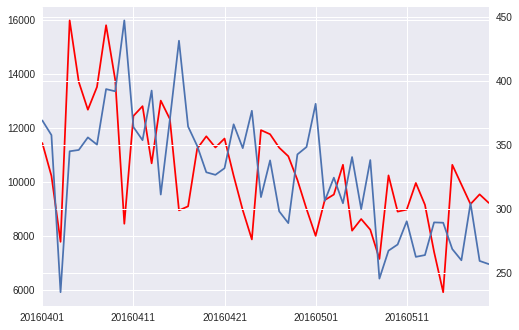

In [45]:
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['mean_steps'].plot(kind='line', stacked=True, ax=ax0, color='r')
df['mean_sleep'].plot(kind='line', secondary_y=True, ax=ax1)

plt.show()